In [1]:
from campa.constants import EXPERIMENT_DIR
from campa.data import MPPData
from campa.tl import Experiment
from campa.tl import Cluster
from campa.tl._cluster import add_clustering_to_adata
from campa.pl import annotate_img
from campa.utils import init_logging
import os
import numpy as np
import scanpy as sc
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = 'white'
init_logging()

In [2]:
# NOTE added 0.5h to all times, to reflect time from fixation
def add_perturbation_plot(adata):
    # create perturbation_plot column from perturbation_duration column
    p = np.array(adata.obs['perturbation_duration'])
    p[p == 'AZD4573-120'] = 'AZD4573 (2.5h)'
    p[p == 'AZD4573-30'] = 'AZD4573 (1h)'
    p[p == 'CX5461-120'] = 'CX5461 (2.5h)'
    p[p == 'Meayamycin-720'] = 'Meayamycin (12.5h)'
    p[p == 'TSA-30'] = 'TSA (1h)'
    p[p == 'Triptolide-120'] = 'Triptolide (2.5h)'
    p[np.in1d(p, ['DMSO-120', 'DMSO-720', 'normal'])] = 'unperturbed'
    adata.obs['perturbation_plot'] = p
    adata.obs['perturbation_plot'] = adata.obs['perturbation_plot'].astype('category')

In [3]:
os.makedirs('fig1', exist_ok=True)
os.makedirs('fig1_suppl', exist_ok=True)

In [4]:
# colors for pixel approach and condVAE:
yellow = '#fcba03'
blue = '#031cfc'

# wells to select example cells from
data_dirs = {
    'Triptolide (2.5h)': '184A1_triptolide/I10',
    'unperturbed': '184A1_unperturbed/I09',
    'TSA (1h)': '184A1_TSA/I16', 
#    'Meayamycin (12.5h)': '184A1_meayamycin/I12'
}

## Load data

In [5]:
adatas = {}
adatas_sub = {}

exp_name = 'VAE_all/CondVAE_pert-CC'
cluster_data_dir = os.path.join(exp_name, 'aggregated/sub-0.001')
# load cl
cl = Cluster.from_cluster_data_dir(cluster_data_dir)
# get adata object
adata = cl.cluster_mpp.get_adata(X='mpp', obsm={'X_latent': 'latent', 'X_umap': 'umap'})
# add clustering and colormap (from cluster_name_annotation.csv) to adata
cl.set_cluster_name('clustering_res0.5') 
add_clustering_to_adata(os.path.join(EXPERIMENT_DIR, cluster_data_dir), 'clustering_res0.5', adata, cl.cluster_annotation)
add_clustering_to_adata(os.path.join(EXPERIMENT_DIR, cluster_data_dir), 'clustering_res0.5', adata, cl.cluster_annotation, annotation_col='annotation')
# create perturbation names to plot
add_perturbation_plot(adata)

# subset of data used in some panels
adata_sub = adata[adata.obs['perturbation_plot'].isin(
    ['Triptolide (2.5h)', 'unperturbed', 'TSA (1h)'])]
adatas['CondVAE'] = adata
adatas_sub['CondVAE'] = adata_sub


INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'latent', 'umap'].
INFO:MPPData:Loaded data from VAE_all/CondVAE_pert-CC/aggregated/sub-0.001.
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'latent', 'umap'].
INFO:Cluster:cannot create annotation without clustering in cluster_mpp
INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering_res0.5', 'umap'].
INFO:MPPData:Loaded data from VAE_all/CondVAE_pert-CC/aggregated/sub-0.001.
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering_res0.5', 'umap'].


In [6]:
exp_name = 'VAE_all/MPPleiden'
cluster_data_dir = os.path.join(exp_name, 'aggregated/sub-0.001')
# load cl
cl = Cluster.from_cluster_data_dir(cluster_data_dir)
# get adata object
adata = cl.cluster_mpp.get_adata(X='mpp', obsm={'X_umap': 'umap'})
# add clustering and colormap (from cluster_name_annotation.csv) to adata
for res in [0.2, 0.4, 0.6, 0.8, 1.2, 1.6, 2.0]:
    cl.set_cluster_name(f'clustering_res{res:.1f}') 
    add_clustering_to_adata(os.path.join(EXPERIMENT_DIR, cluster_data_dir), f'clustering_res{res:.1f}', adata, cl.cluster_annotation)

# create perturbation names to plot
add_perturbation_plot(adata)

# subset of data used in some panels
adata_sub = adata[adata.obs['perturbation_plot'].isin(
    ['Triptolide (2.5h)', 'unperturbed', 'TSA (1h)'])]
adatas['MPPleiden'] = adata
adatas_sub['MPPleiden'] = adata_sub


INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'umap'].
INFO:MPPData:Loaded data from VAE_all/MPPleiden/aggregated/sub-0.001.
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'umap'].
INFO:Cluster:cannot create annotation without clustering in cluster_mpp
INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'clustering_res0.2', 'umap'].
INFO:MPPData:Loaded data from VAE_all/MPPleiden/aggregated/sub-0.001.
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'clustering_res0.2', 'umap'].
INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['

Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_all/MPPleiden/aggregated/sub-0.001/clustering_res0.2.npy
Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_all/MPPleiden/aggregated/sub-0.001/clustering_res0.4.npy


INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'clustering_res0.6', 'umap'].
INFO:MPPData:Loaded data from VAE_all/MPPleiden/aggregated/sub-0.001.
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'clustering_res0.6', 'umap'].
INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'clustering_res0.8', 'umap'].
INFO:MPPData:Loaded data from VAE_all/MPPleiden/aggregated/sub-0.001.
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'clustering_res0.8', 'umap'].


Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_all/MPPleiden/aggregated/sub-0.001/clustering_res0.6.npy
Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_all/MPPleiden/aggregated/sub-0.001/clustering_res0.8.npy


INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'clustering_res1.2', 'umap'].
INFO:MPPData:Loaded data from VAE_all/MPPleiden/aggregated/sub-0.001.
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'clustering_res1.2', 'umap'].
INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'clustering_res1.6', 'umap'].
INFO:MPPData:Loaded data from VAE_all/MPPleiden/aggregated/sub-0.001.
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'clustering_res1.6', 'umap'].


Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_all/MPPleiden/aggregated/sub-0.001/clustering_res1.2.npy
Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_all/MPPleiden/aggregated/sub-0.001/clustering_res1.6.npy


INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'clustering_res2.0', 'umap'].
INFO:MPPData:Loaded data from VAE_all/MPPleiden/aggregated/sub-0.001.
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'clustering_res2.0', 'umap'].


Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_all/MPPleiden/aggregated/sub-0.001/clustering_res2.0.npy


In [7]:
# example data
example_mpp_data = {'CondVAE':{}, 'MPPleiden': {}}

for name, data_dir in data_dirs.items():
    print(data_dir)
    example_mpp_data['CondVAE'][name] = MPPData.from_data_dir(data_dir, base_dir=os.path.join(EXPERIMENT_DIR, 'VAE_all/CondVAE_pert-CC/aggregated/full_data'), 
                                                    keys=['x', 'y', 'obj_ids', 'latent'], optional_keys=[])

for name, data_dir in data_dirs.items():
    print(data_dir)
    example_mpp_data['MPPleiden'][name] = MPPData.from_data_dir(data_dir, base_dir=os.path.join(EXPERIMENT_DIR, 'VAE_all/MPPleiden/aggregated/full_data'), 
                                                    keys=['x', 'y', 'obj_ids', 'mpp'], optional_keys=[])


184A1_triptolide/I10


INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for NascentRNA (10609863 mpps with shape (1, 1, 35) from 842 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from 184A1_triptolide/I10.
INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for NascentRNA (5998677 mpps with shape (1, 1, 34) from 506 objects). Data keys: ['y', 'x', 'latent', 'obj_ids', 'mpp'].
INFO:MPPData:Before subsetting: 842 objects
INFO:MPPData:Subsetting to 506 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent']
INFO:MPPData:Loaded data from 184A1_triptolide/I10, with base data from 184A1_triptolide/I10


184A1_unperturbed/I09


INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for NascentRNA (12132995 mpps with shape (1, 1, 35) from 886 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from 184A1_unperturbed/I09.
INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for NascentRNA (7218204 mpps with shape (1, 1, 34) from 557 objects). Data keys: ['y', 'x', 'latent', 'obj_ids', 'mpp'].
INFO:MPPData:Before subsetting: 886 objects
INFO:MPPData:Subsetting to 557 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent']
INFO:MPPData:Loaded data from 184A1_unperturbed/I09, with base data from 184A1_unperturbed/I09


184A1_TSA/I16


INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for NascentRNA (13348206 mpps with shape (1, 1, 35) from 994 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from 184A1_TSA/I16.
INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for NascentRNA (7712953 mpps with shape (1, 1, 34) from 617 objects). Data keys: ['y', 'x', 'latent', 'obj_ids', 'mpp'].
INFO:MPPData:Before subsetting: 994 objects
INFO:MPPData:Subsetting to 617 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent']
INFO:MPPData:Loaded data from 184A1_TSA/I16, with base data from 184A1_TSA/I16


184A1_triptolide/I10


INFO:MPPData:Created new: MPPData for NascentRNA (10609863 mpps with shape (1, 1, 35) from 842 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from 184A1_triptolide/I10.
INFO:MPPData:Created new: MPPData for NascentRNA (5998677 mpps with shape (1, 1, 34) from 506 objects). Data keys: ['y', 'x', 'obj_ids', 'mpp'].
INFO:MPPData:Before subsetting: 842 objects
INFO:MPPData:Subsetting to 506 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp']
INFO:MPPData:Loaded data from 184A1_triptolide/I10, with base data from 184A1_triptolide/I10


184A1_unperturbed/I09


INFO:MPPData:Created new: MPPData for NascentRNA (12132995 mpps with shape (1, 1, 35) from 886 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from 184A1_unperturbed/I09.
INFO:MPPData:Created new: MPPData for NascentRNA (7218204 mpps with shape (1, 1, 34) from 557 objects). Data keys: ['y', 'x', 'obj_ids', 'mpp'].
INFO:MPPData:Before subsetting: 886 objects
INFO:MPPData:Subsetting to 557 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp']
INFO:MPPData:Loaded data from 184A1_unperturbed/I09, with base data from 184A1_unperturbed/I09


184A1_TSA/I16


INFO:MPPData:Created new: MPPData for NascentRNA (13348206 mpps with shape (1, 1, 35) from 994 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from 184A1_TSA/I16.
INFO:MPPData:Created new: MPPData for NascentRNA (7712953 mpps with shape (1, 1, 34) from 617 objects). Data keys: ['y', 'x', 'obj_ids', 'mpp'].
INFO:MPPData:Before subsetting: 994 objects
INFO:MPPData:Subsetting to 617 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp']
INFO:MPPData:Loaded data from 184A1_TSA/I16, with base data from 184A1_TSA/I16


## Umaps and example cells

In [10]:
sns.set_style('white')
sns.set_context('talk')

perturbation_plot_colors = {
    'unperturbed': "#999999",
#    'Meayamycin (12.5h)':  "#56B4E9",
    'Triptolide (2.5h)': "#008000", #"#E69F00",
    'TSA (1h)': "#00FF00", # "#009E73",
}

### CondVAE

In [11]:
adata = adatas['CondVAE']
adata_sub = adatas_sub['CondVAE']
# add colors
adata_sub.uns['perturbation_plot_colors'] = [perturbation_plot_colors[p] for p in adata_sub.obs['perturbation_plot'].cat.categories]

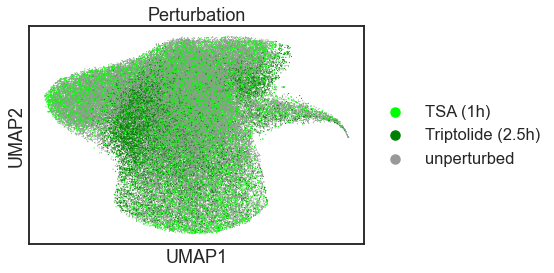

In [12]:
# plot perturbation on subset of data
# ensure that order of points is random
random_indices=np.random.permutation(list(range(adata_sub.shape[0])))
fig, ax = plt.subplots()
sc.pl.umap(adata_sub[random_indices], color='perturbation_plot', size=5, legend_loc='right margin', title='Perturbation', ax=ax, show=False)
plt.savefig('fig1/umap_condVAE_perturbation.png', bbox_inches='tight', dpi=300)

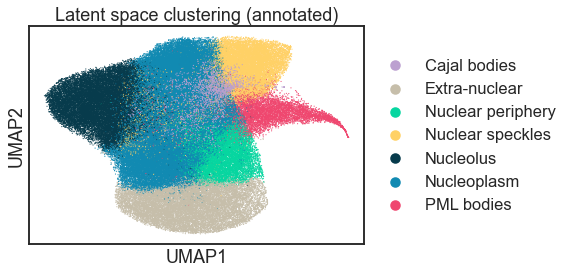

In [13]:
# plot annotated clustering (with cajal bodies on top) on all data
indices = set(range(adata.shape[0]))
cajal_indices = list(np.where(adata.obs['annotation'] == 'Cajal bodies')[0])
reordered_indices = list(indices.difference(cajal_indices)) + cajal_indices
fig, ax = plt.subplots()
sc.pl.umap(adata[reordered_indices], color='annotation', size=5, legend_loc='right margin', title='Latent space clustering (annotated)', ax=ax, show=False)
plt.savefig('fig1/umap_condVAE_annotation_all.png', bbox_inches='tight', dpi=300)

#### example cells

In [14]:
cluster_data_dir = os.path.join('VAE_all/CondVAE_pert-CC', 'aggregated/sub-0.001')
num_objs = 5
cluster_name = 'clustering_res0.5'

example_cells = {}
cl = Cluster.from_cluster_data_dir(cluster_data_dir)
cl.set_cluster_name(cluster_name) 
for name, mpp_data in example_mpp_data['CondVAE'].items():
     # choose num_objs cells
     rng = np.random.default_rng(seed=40)
     obj_ids = rng.choice(mpp_data.unique_obj_ids, num_objs, replace=False)
     sub_mpp_data = cl.project_clustering(mpp_data.subset(obj_ids=obj_ids, copy=True))
     example_cells[name] = sub_mpp_data.get_object_imgs(data=cluster_name, annotation_kwargs={'color':True, 'annotation': cl.cluster_annotation, 'to_col': 'annotation'}, img_size=160)


INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'latent', 'umap'].
INFO:MPPData:Loaded data from VAE_all/CondVAE_pert-CC/aggregated/sub-0.001.
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'latent', 'umap'].
INFO:Cluster:cannot create annotation without clustering in cluster_mpp
INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering_res0.5', 'umap'].
INFO:MPPData:Loaded data from VAE_all/CondVAE_pert-CC/aggregated/sub-0.001.
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering_res0.5', 'umap'].
INFO:MPPData:Before subsetting: 506 objects
INFO:MPPData:Subsettin

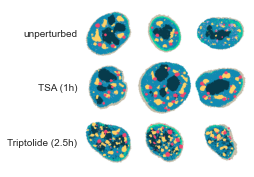

In [15]:
perts = ['unperturbed', 'TSA (1h)', 'Triptolide (2.5h)']
sns.set_context('talk')
with sns.axes_style('white'):
    fig, axes = plt.subplots(3,3, figsize=(3,3))
    for j, col in enumerate(axes.T):
        for i, ax in enumerate(col):
            ax.imshow(example_cells[perts[i]][j])
            ax.set_yticks([])
            ax.set_xticks([])
            if j == 0:
                ax.set_ylabel(perts[i], rotation=0, ha='right', va='center', fontsize=10)
    fig.subplots_adjust(wspace=0, hspace=0)
    sns.despine(left=True, bottom=True)
plt.savefig('fig1/example_cells_CondVAE.png', dpi=300, bbox_inches='tight')

/var/folders/s9/0d6yy20d44v60qd0nfkjlqdd541mvv/T/ipykernel_97783/4013617750.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


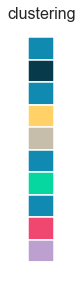

In [35]:
# build cluster colorbar
fig, ax = plt.subplots(1,1, figsize=(0.5,5))
ax.barh(range(11), height=1, width=1, color=cl.cluster_annotation['annotation_colors'])
ax.set_title('clustering', fontdict={'fontsize': 16})
ax.invert_yaxis()
ax.axis('off')
plt.tight_layout()
plt.savefig(os.path.join('fig1', 'cluster_colorbar_CondVAE.png'), dpi=100, bbox_inches='tight')

### MPPleiden

In [36]:
adata = adatas['MPPleiden']
adata_sub = adatas_sub['MPPleiden']
# add colors
adata_sub.uns['perturbation_plot_colors'] = [perturbation_plot_colors[p] for p in adata_sub.obs['perturbation_plot'].cat.categories]

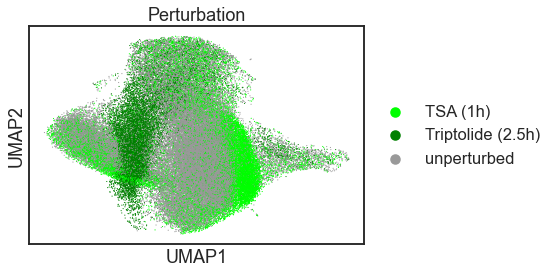

In [37]:
# plot perturbation
# ensure that order of points is random
random_indices=np.random.permutation(list(range(adata_sub.shape[0])))
fig, ax = plt.subplots()
sc.pl.umap(adata_sub[random_indices], color='perturbation_plot', size=5, legend_loc='right margin', title='Perturbation', ax=ax, show=False)
plt.savefig('fig1/umap_MPPleiden_perturbation.png', bbox_inches='tight', dpi=300)

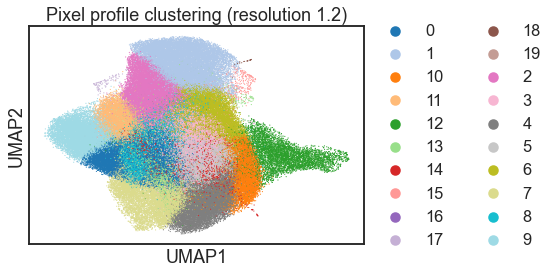

In [38]:
# plot annotated clustering
random_indices=np.random.permutation(list(range(adata.shape[0])))
fig, ax = plt.subplots()
sc.pl.umap(adata[reordered_indices], color='clustering_res1.2', size=5, legend_loc='right margin', title='Pixel profile clustering (resolution 1.2)', ax=ax, show=False)
plt.savefig('fig1/umap_MPPleiden_clustering_all.png', bbox_inches='tight', dpi=300)

#### example cells

In [39]:
cluster_data_dir = os.path.join('VAE_all/MPPleiden', 'aggregated/sub-0.001')
num_objs = 5
cluster_name = 'clustering_res1.2'

example_cells = {}
cl = Cluster.from_cluster_data_dir(cluster_data_dir)
cl.set_cluster_name(cluster_name)
# NOTE: ensure that clustering is U21 to have correct background color
cl.cluster_mpp._data[cluster_name] = cl.cluster_mpp._data[cluster_name].astype('<U21')
for name, mpp_data in example_mpp_data['MPPleiden'].items():
     # choose num_objs cells
     rng = np.random.default_rng(seed=40)
     obj_ids = rng.choice(mpp_data.unique_obj_ids, num_objs, replace=False)
     sub_mpp_data = cl.project_clustering(mpp_data.subset(obj_ids=obj_ids, copy=True))
     example_cells[name] = sub_mpp_data.get_object_imgs(data=cluster_name, annotation_kwargs={'color':True, 'annotation': cl.cluster_annotation}, img_size=160)


INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'umap'].
INFO:MPPData:Loaded data from VAE_all/MPPleiden/aggregated/sub-0.001.
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'umap'].
INFO:Cluster:cannot create annotation without clustering in cluster_mpp
INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'clustering_res1.2', 'umap'].
INFO:MPPData:Loaded data from VAE_all/MPPleiden/aggregated/sub-0.001.
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'clustering_res1.2', 'umap'].


Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_all/MPPleiden/aggregated/sub-0.001/clustering_res1.2.npy


INFO:MPPData:Before subsetting: 506 objects
INFO:MPPData:Subsetting to 5 objects
INFO:MPPData:Created new: MPPData for NascentRNA (52084 mpps with shape (1, 1, 34) from 5 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:Cluster:Projecting clustering to 52084 samples
INFO:Cluster:processing chunk 0
INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 5 objects
INFO:MPPData:Created new: MPPData for NascentRNA (51592 mpps with shape (1, 1, 34) from 5 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:Cluster:Projecting clustering to 51592 samples
INFO:Cluster:processing chunk 0
INFO:MPPData:Before subsetting: 617 objects
INFO:MPPData:Subsetting to 5 objects
INFO:MPPData:Created new: MPPData for NascentRNA (64506 mpps with shape (1, 1, 34) from 5 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:Cluster:Projecting clustering to 64506 samples
INFO:Cluster:processing chunk 0


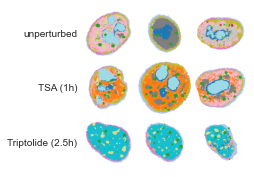

In [40]:
perts = ['unperturbed', 'TSA (1h)', 'Triptolide (2.5h)']
sns.set_context('talk')
with sns.axes_style('white'):
    fig, axes = plt.subplots(3,3, figsize=(3,3))
    for j, col in enumerate(axes.T):
        for i, ax in enumerate(col):
            ax.imshow(example_cells[perts[i]][j])
            ax.set_yticks([])
            ax.set_xticks([])
            if j == 0:
                ax.set_ylabel(perts[i], rotation=0, ha='right', va='center', fontsize=10)
    fig.subplots_adjust(wspace=0, hspace=0)
    sns.despine(left=True, bottom=True)
plt.savefig('fig1/example_cells_MPPleiden.png', dpi=300, bbox_inches='tight')

/var/folders/s9/0d6yy20d44v60qd0nfkjlqdd541mvv/T/ipykernel_97783/4054424406.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


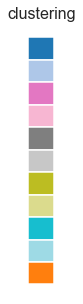

In [43]:
# build cluster colorbar
fig, ax = plt.subplots(1,1, figsize=(0.5,5))
ax.barh(range(11), height=1, width=1, color=cl.cluster_annotation['clustering_res1.2_colors'])
ax.set_title('clustering', fontdict={'fontsize': 16})
ax.invert_yaxis()
ax.axis('off')
plt.tight_layout()
plt.savefig(os.path.join('fig1', 'cluster_colorbar_MPPleiden.png'), dpi=100, bbox_inches='tight')

## Cluster size variation per perturbation
using all perturbations

In [7]:
coeff_variation = {'CondVAE':{}, 'MPPleiden':{}}

sns.set_style('white')
sns.set_context('poster', rc = {'patch.linewidth': 0.0})

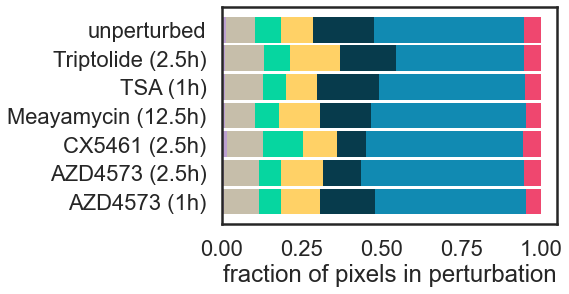

In [8]:
# calculate
adata = adatas['CondVAE']
cluster_name = 'annotation'

cluster_size = {}
for pert, grp in adata.obs.groupby('perturbation_plot'):
    cluster_size[pert] = grp.groupby(cluster_name)['mapobject_id'].count()
df = pd.concat(cluster_size, axis=1)
df = df / df.sum(axis=0)

coeff_variation['CondVAE'][cluster_name] = df.std(axis=1) / df.mean(axis=1)

# plot
cats = adata.obs[cluster_name].cat.categories
fig, ax = plt.subplots()
bottom = np.array([0 for _ in df.columns]).astype('float')
for i in range(len(cats)):
    if i > 0:
        bottom += np.array(df.loc[cats[i-1]])
    ax.barh(list(df.columns), list(df.loc[cats[i]]), 0.9, label=cats[i], left=bottom, 
        color=adata.uns[cluster_name+'_colors'][i])
ax.set_xlabel('fraction of pixels in perturbation')
plt.savefig(f'fig1/cluster_size_condVAE_{cluster_name}.png', bbox_inches='tight')

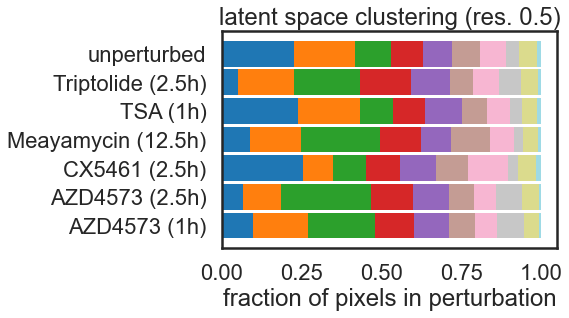

In [9]:
# calculate
adata = adatas['CondVAE']
cluster_name = 'clustering_res0.5'

cluster_size = {}
for pert, grp in adata.obs.groupby('perturbation_plot'):
    cluster_size[pert] = grp.groupby(cluster_name)['mapobject_id'].count()
df = pd.concat(cluster_size, axis=1)
df = df / df.sum(axis=0)

coeff_variation['CondVAE'][cluster_name] = df.std(axis=1) / df.mean(axis=1)

# plot
cats = adata.obs[cluster_name].cat.categories
fig, ax = plt.subplots()
bottom = np.array([0 for _ in df.columns]).astype('float')
for i in range(len(cats)):
    if i > 0:
        bottom += np.array(df.loc[cats[i-1]])
    ax.barh(list(df.columns), list(df.loc[cats[i]]), 0.9, label=cats[i], left=bottom, 
        color=adata.uns[cluster_name+'_colors'][i])
ax.set_xlabel('fraction of pixels in perturbation')
ax.set_title('latent space clustering (res. 0.5)')
plt.savefig(f'fig1_suppl/cluster_size_condVAE_{cluster_name}.png', bbox_inches='tight')

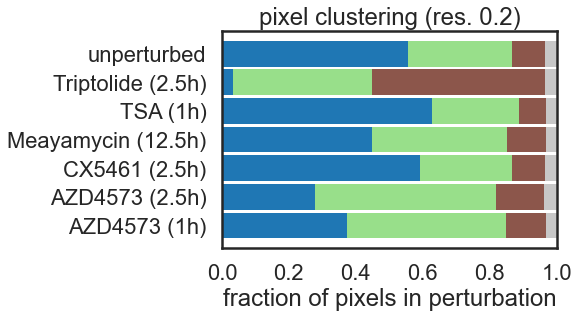

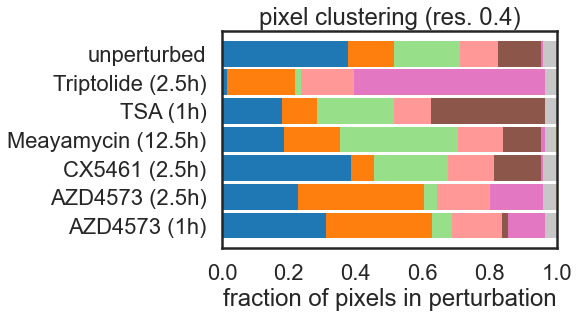

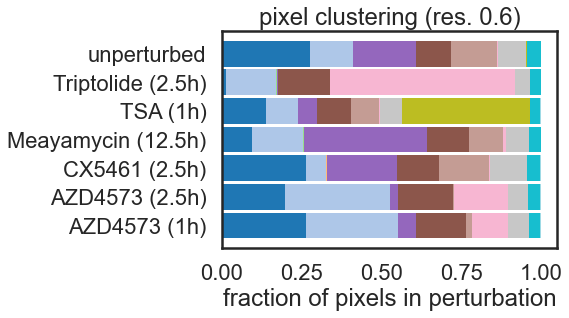

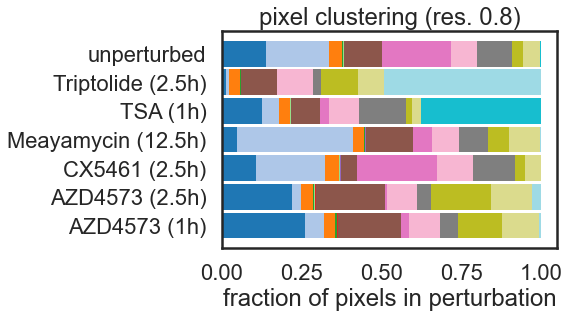

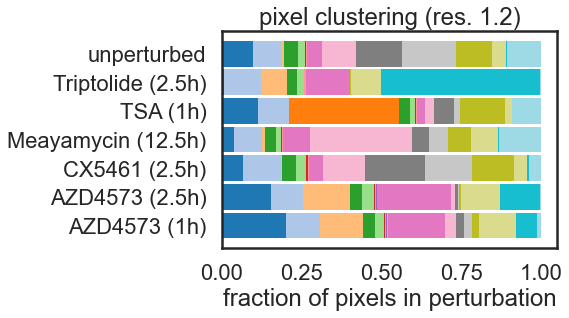

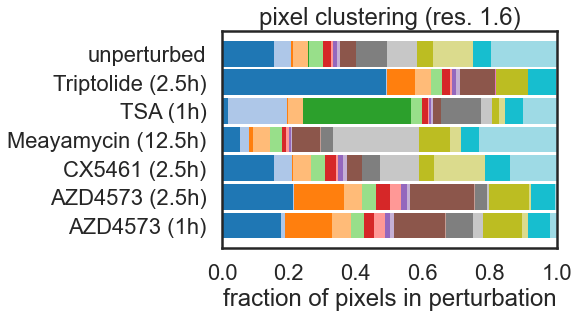

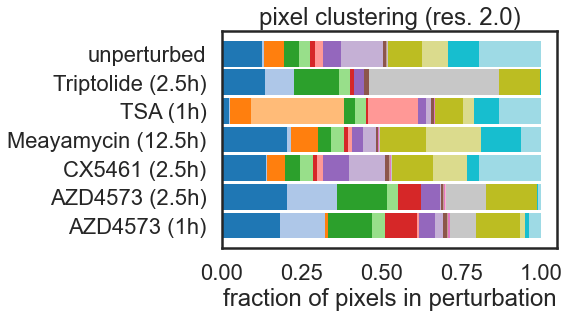

In [11]:
# calculate
adata = adatas['MPPleiden']
for res in [0.2, 0.4, 0.6, 0.8, 1.2, 1.6, 2.0]:
    cluster_name = f'clustering_res{res:.1f}'

    cluster_size = {}
    for pert, grp in adata.obs.groupby('perturbation_plot'):
        cluster_size[pert] = grp.groupby(cluster_name)['mapobject_id'].count()
    df = pd.concat(cluster_size, axis=1)
    df = df / df.sum(axis=0)

    coeff_variation['MPPleiden'][cluster_name] = df.std(axis=1) / df.mean(axis=1)

    # plot
    cats = adata.obs[cluster_name].cat.categories
    fig, ax = plt.subplots()
    bottom = np.array([0 for _ in df.columns]).astype('float')
    for i in range(len(cats)):
        if i > 0:
            bottom += np.array(df.loc[cats[i-1]])
        ax.barh(list(df.columns), list(df.loc[cats[i]]), 0.9, label=cats[i], left=bottom, 
            color=adata.uns[cluster_name+'_colors'][i])
    ax.set_xlabel('fraction of pixels in perturbation')
    ax.set_title(f'pixel clustering (res. {res:.1f})')
    plt.savefig(f'fig1_suppl/cluster_size_MPPleiden_{cluster_name}.png', bbox_inches='tight')

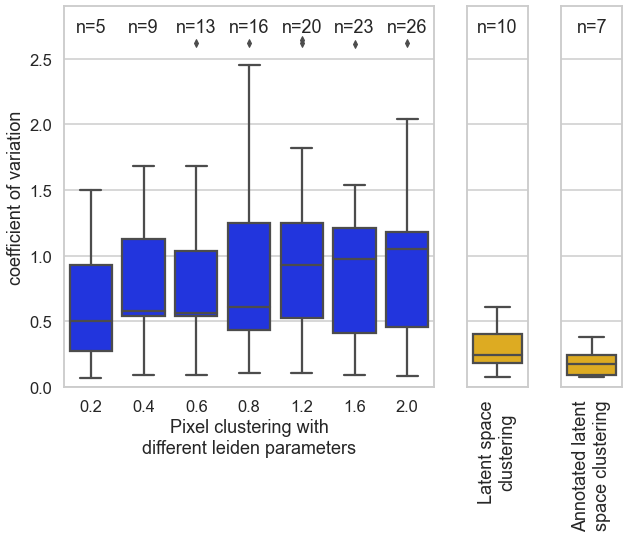

In [73]:
sns.set_style('whitegrid')
sns.set_context('talk')

df = pd.concat(coeff_variation['MPPleiden']).reset_index()
fig, axes = plt.subplots(1,3, figsize=(10,7), sharey=True, gridspec_kw={'width_ratios': [6, 1, 1]})
p = sns.boxplot(data=df, x='level_0', y=0, color=blue, ax=axes[0])
p.set(xlabel='Pixel clustering with\ndifferent leiden parameters', ylabel='coefficient of variation')
axes[0].set_xticklabels([0.2, 0.4, 0.6, 0.8, 1.2, 1.6, 2.0])
# add cluster number
num_clusters = [len(adatas['MPPleiden'].obs[f'clustering_res{res:.1f}'].cat.categories) for res in [0.2, 0.4, 0.6, 0.8, 1.2, 1.6, 2.0]]
for i,n in enumerate(num_clusters):
    axes[0].annotate(f'n={n}', (i,2.7), ha='center')

df = coeff_variation['CondVAE']['clustering_res0.5'].reset_index()
df['level_0'] = 1
p = sns.boxplot(data=df, x='level_0', y=0, color=yellow, ax=axes[1])
p.set(xlabel='', ylabel='')
axes[1].set_xticklabels(['Latent space\nclustering'], rotation=90, fontdict={'fontsize': 18})
# add cluster number
num_clusters = len(adatas['CondVAE'].obs[f'clustering_res0.5'].cat.categories)
axes[1].annotate(f'n={num_clusters}', (0,2.7), ha='center')

df = coeff_variation['CondVAE']['annotation'].reset_index()
df['level_0'] = 1
p = sns.boxplot(data=df, x='level_0', y=0, color=yellow, ax=axes[2])
p.set(xlabel='', ylabel='')
axes[2].set_xticklabels(['Annotated latent\nspace clustering'], rotation=90, fontdict={'fontsize': 18})
# add cluster number
num_clusters = len(adatas['CondVAE'].obs[f'annotation'].cat.categories)
axes[2].annotate(f'n={num_clusters}', (0,2.7), ha='center')

plt.ylim(0,2.9)
plt.savefig('fig1/coeff_variation_clustering.png', bbox_inches='tight')


In [83]:
# print mean coefficient of variation
print('MPPleiden clustering')
for res in [0.2, 0.4, 0.6, 0.8, 1.2, 1.6, 2.0]:
    print('\tresolution {}: {:.2f}'.format( res,
        np.mean(coeff_variation['MPPleiden'][f'clustering_res{res:.1f}'])))
print('CondVAE clustering: {:.2f}'.format(np.mean(coeff_variation['CondVAE']['clustering_res0.5'])))
print('CondVAE annotation: {:.2f}'.format(np.mean(coeff_variation['CondVAE']['annotation'])))

MPPleiden clustering
	resolution 0.2: 0.65
	resolution 0.4: 0.78
	resolution 0.6: 0.86
	resolution 0.8: 0.89
	resolution 1.2: 1.02
	resolution 1.6: 0.88
	resolution 2.0: 0.97
CondVAE clustering: 0.29
CondVAE annotation: 0.18


## Linear classifier for predicting perturbation from latent space (on val data)

### calculate scores

In [87]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, accuracy_score

def get_prediction_scores(X, y, measure='acc', n_val=10000, class_weights=None):
    scaled_X = preprocessing.StandardScaler().fit_transform(X)
    np.random.seed(0)
    scores = []
    # 10 times with different score
    for i in range(10):
        mask = np.full(len(y), False)
        mask[:n_val] = True
        np.random.shuffle(mask)
        clf = LogisticRegression().fit(scaled_X[~mask] , y[~mask])
        #print(len(scaled_X[mask]))
        ypred = clf.predict(scaled_X[mask])
        if measure == 'acc':
            weights = None
            if class_weights is not None:
                weights = class_weights[y[mask].astype(int)]
            score = accuracy_score(y[mask], ypred, sample_weight=weights)
        elif measure == 'balanced_acc':
            score = balanced_accuracy_score(y[mask], ypred)
        scores.append(score)
    return scores

In [88]:
exp_name = 'VAE_all/CondVAE_pert-CC'
val_data = MPPData.from_data_dir(data_dir=exp_name+'/results_epoch025/val', base_dir=EXPERIMENT_DIR, keys=['x','y','obj_ids','latent'])
adata_val = val_data.get_adata(obsm={'X_latent':'latent'})
add_perturbation_plot(adata_val)

INFO:MPPData:Created new: MPPData for NascentRNA (76432 mpps with shape (3, 3, 34) from 1181 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from datasets/184A1_all_frac0005_neigh3_cond_pert-CC/val.
INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for NascentRNA (76432 mpps with shape (1, 1, 34) from 1181 objects). Data keys: ['y', 'x', 'latent', 'obj_ids', 'mpp'].
INFO:MPPData:Before subsetting: 1181 objects
INFO:MPPData:Subsetting to 1181 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions', 'latent']
INFO:MPPData:Loaded data from VAE_all/CondVAE_pert-CC/results_epoch025/val, with base data from datasets/184A1_all_frac0005_neigh3_cond_pert-CC/val


In [90]:
scores = {}
# classification from latent
scores_latent = {}
for pert in ['AZD4573 (1h)', 'AZD4573 (2.5h)', 'CX5461 (2.5h)', 'Meayamycin (12.5h)', 'TSA (1h)', 'Triptolide (2.5h)']:
    # prediction scores for distinguishing perturbations
    mask = np.in1d(adata_val.obs['perturbation_plot'], ['unperturbed', pert])
    y = adata_val[mask].obs['perturbation_plot'] == pert
    X = adata_val[mask].obsm['X_latent']
    X_pca = PCA(n_components=10).fit_transform(X)
    scores_latent[pert] = get_prediction_scores(X_pca, y, n_val=int(len(y)*0.1), measure='balanced_acc')
scores['latent space'] = scores_latent

# classification from MPP
scores_mpp = {}
for pert in ['AZD4573 (1h)', 'AZD4573 (2.5h)', 'CX5461 (2.5h)', 'Meayamycin (12.5h)', 'TSA (1h)', 'Triptolide (2.5h)']:
    # prediction scores for distinguishing perturbations
    mask = np.in1d(adata_val.obs['perturbation_plot'], ['unperturbed', pert])
    y = adata_val[mask].obs['perturbation_plot'] == pert
    X = adata_val[mask].X
    X_pca = PCA(n_components=10).fit_transform(X)
    scores_mpp[pert] = get_prediction_scores(X_pca, y, n_val=int(len(y)*0.1), measure='balanced_acc')
scores['pixel profile'] = scores_mpp

# save scores
json.dump(scores, open('fig1/acc_linear_classifier.json', 'w'), indent=4)

### plot scores

In [94]:
scores = json.load(open('fig1/acc_linear_classifier.json', 'r'))

In [95]:
df = pd.concat({key: pd.DataFrame(scores[key]).mean(axis=0) for key in scores.keys()}, axis=0)
df.index.set_names(['data type', 'perturbation'], inplace=True)
df = df.reset_index().rename(columns={0:'balanced accuracy'})

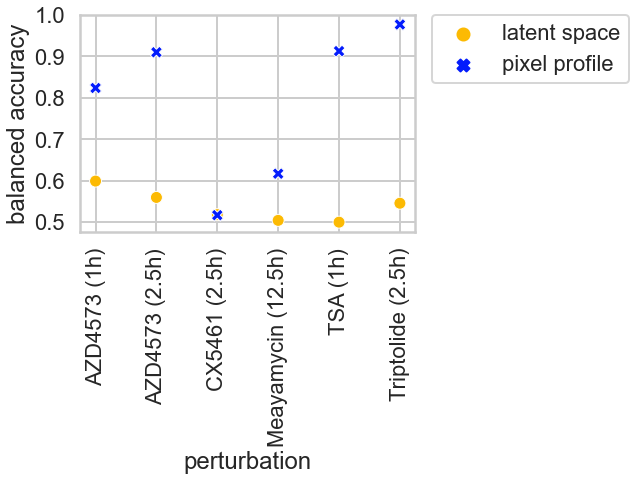

In [93]:
sns.set_style('whitegrid')
sns.set_context('poster')
sns.scatterplot(data=df, x='perturbation', y='balanced accuracy', hue='data type', style='data type', palette=[yellow, blue])
plt.xticks(rotation=90)
plt.yticks([0.5,0.6,0.7,0.8,0.9,1.0])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('fig1/acc_linear_classifier.png', bbox_inches='tight')

In [ ]:
sns.set_style('whitegrid')
sns.set_context('poster')
fig, ax = plt.subplots(1,1, figsize=(3,3))
sns.scatterplot(data=df, x='balanced accuracy', y='perturbation', hue='data type', style='data type', palette=[yellow, blue], ax=ax, s=200)
plt.xticks([0.5,0.6,0.7,0.8,0.9,1.0])
plt.legend(bbox_to_anchor=(0.00, -0.50), loc=2, borderaxespad=0.)
plt.savefig('fig1/acc_linear_classifier_poster.png', bbox_inches='tight')

In [98]:
# print mean acc for each classifier
df.groupby('data type').mean()

,balanced accuracy
data type,
latent space,0.537747
pixel profile,0.792855
